In [2]:
import pandas as pd
import numpy as np
import math
import json
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# read in the json files
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

In [4]:
portfolio.shape

(10, 6)

In [5]:
portfolio.head(10)

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [6]:
portfolio['channels'].value_counts

<bound method IndexOpsMixin.value_counts of 0         [email, mobile, social]
1    [web, email, mobile, social]
2            [web, email, mobile]
3            [web, email, mobile]
4                    [web, email]
5    [web, email, mobile, social]
6    [web, email, mobile, social]
7         [email, mobile, social]
8    [web, email, mobile, social]
9            [web, email, mobile]
Name: channels, dtype: object>

In [7]:
for value in ['web', 'email', 'mobile', 'social']:
    portfolio[value] = portfolio['channels'].apply(lambda x: 1 if value in x else 0)

portfolio.drop('channels', axis = 1, inplace = True)
portfolio.head()

,difficulty,duration,id,offer_type,reward,web,email,mobile,social
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,0,1,1,1
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,1,0
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,1,0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,1,0,0


## profile dataset feature engineering

In [8]:
profile.shape

(17000, 5)

In [9]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [10]:
profile['year'] = profile.became_member_on.apply(lambda x: int(str(x)[:4]))
profile['month'] = profile.became_member_on.apply(lambda x: int(str(x)[4:6]))
profile['daty'] = profile.became_member_on.apply(lambda x: int(str(x)[6:]))
profile['date'] = profile.became_member_on.apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'))
profile.drop('became_member_on', axis=1, inplace = True)

In [11]:
profile.head()

,age,gender,id,income,year,month,daty,date
0,118,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,2017,2,12,2017-02-12
1,55,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,7,15,2017-07-15
2,118,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,2018,7,12,2018-07-12
3,75,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,5,9,2017-05-09
4,118,None,a03223e636434f42ac4c3df47e8bac43,NaN,2017,8,4,2017-08-04


## Transcript Dataset Feature engineering

In [12]:
transcript.shape

(306534, 4)

In [13]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [14]:
transcript['type'] = transcript['value'].apply(lambda x: list(x.keys())[0])
transcript['value'] = transcript['value'].apply(lambda x: list(x.values())[0])

In [15]:
transcript.head()

,event,person,time,value,type
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer id
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer id
2,offer received,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,offer id
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,offer id
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,offer id


In [16]:
transcript.type.value_counts()

amount      138953
offer id    134002
offer_id     33579
Name: type, dtype: int64

In [17]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

## EDA

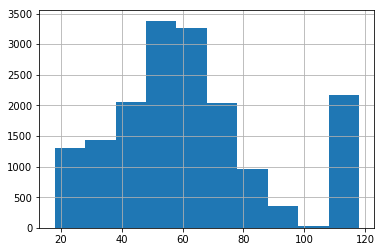

In [18]:
profile['age'].hist()

In [19]:
profile = profile[profile['age'] <= 100]

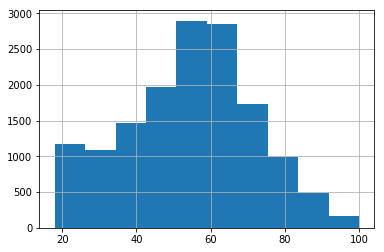

In [20]:
profile['age'].hist()

Text(0.5, 0, 'age')

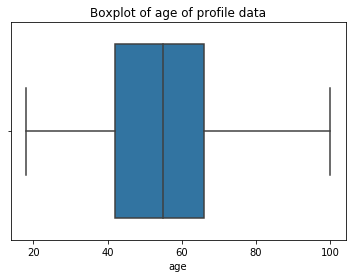

In [21]:
sns.boxplot(profile['age'], showfliers=False) 
plt.title('Boxplot of age of profile data')
plt.xlabel('age')

In [22]:
print (profile.age.mean())
print (profile.age.median())

54.377800269905535
55.0


Text(0.5, 0, 'income')

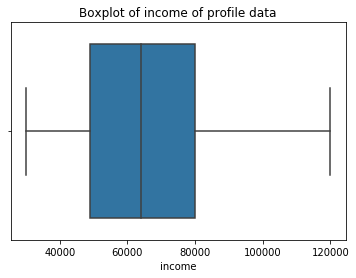

In [27]:
sns.boxplot(profile['income'], showfliers=False) 
plt.title('Boxplot of income of profile data')
plt.xlabel('income')

In [24]:
print (profile.income.mean())
print (profile.income.median())

65404.18353576248
64000.0


In [25]:
(profile.isnull().sum())

age       0
gender    0
id        0
income    0
year      0
month     0
daty      0
date      0
dtype: int64

In [26]:
(transcript.isnull().sum())

event     0
person    0
time      0
value     0
type      0
dtype: int64

In [28]:
(portfolio.isnull().sum())

difficulty    0
duration      0
id            0
offer_type    0
reward        0
web           0
email         0
mobile        0
social        0
dtype: int64

In [29]:
profile.gender.value_counts()

M    8484
F    6124
O     212
Name: gender, dtype: int64

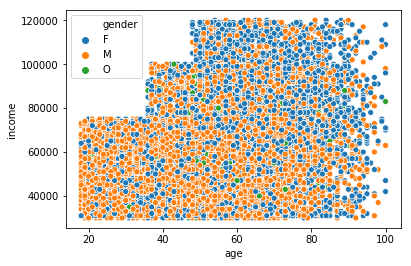

In [30]:
sns.scatterplot(x='age', y='income', hue='gender', data = profile,)

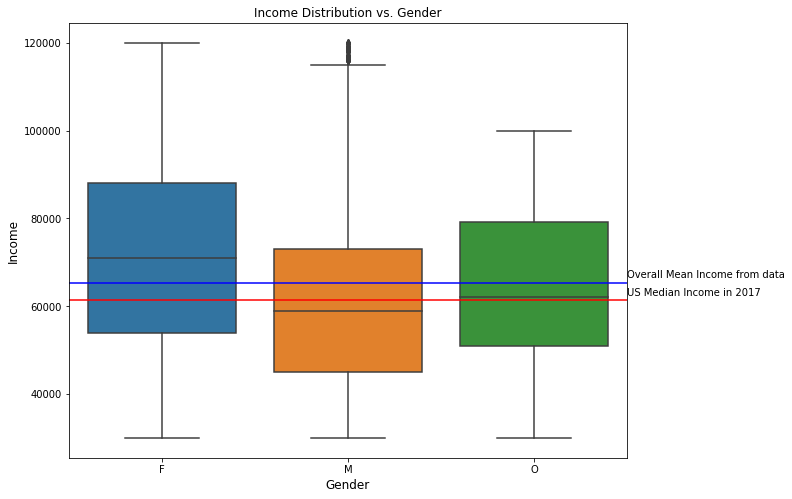

In [31]:
mean_income = profile.income.mean()
us_median = 61372
plt.figure(figsize=(10,8))
sns.boxplot(x = 'gender', y = 'income', data = profile)
plt.hlines(mean_income, -100, 1000, color = 'b')
plt.hlines(us_median, -100, 1000, color = 'r')

plt.ylabel('Income', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.title('Income Distribution vs. Gender')
plt.text(x = 2.5, y = mean_income + 1000, s = "Overall Mean Income from data", color = 'black')
plt.text(x = 2.5, y = us_median + 1000, s = "US Median Income in 2017", color = 'black');

## Sign up trend

Text(0.5, 1.0, 'Number of Sign Ups Each Day')

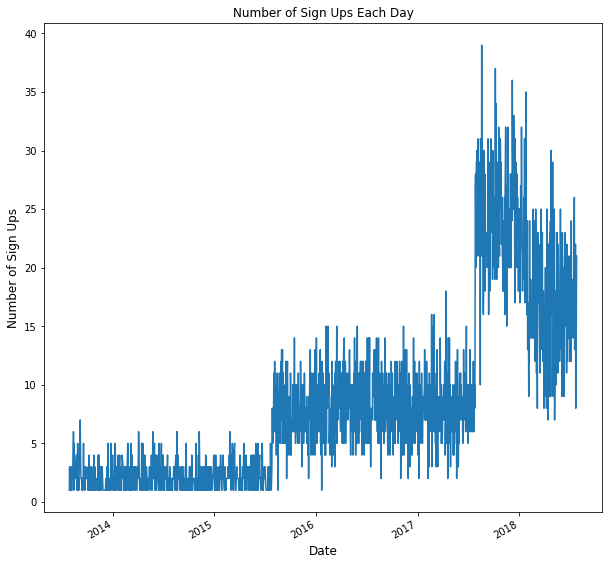

In [32]:
profile.date.value_counts().plot(kind = 'line', figsize = (10,10))
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Number of Sign Ups', fontsize = 12)
plt.title('Number of Sign Ups Each Day')

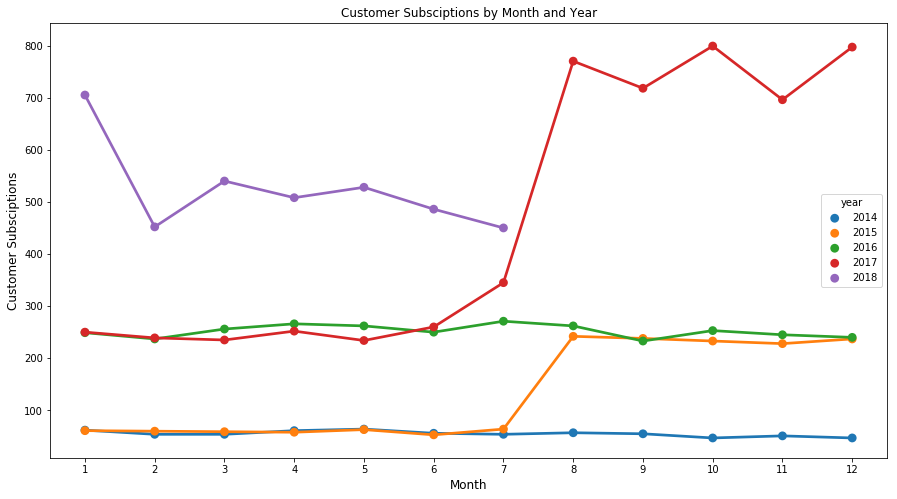

In [33]:
membership_subs = profile[profile['year'] >= 2014].groupby(['year','month'], as_index=False).agg({'id':'count'})
plt.figure(figsize=(15,8))
sns.pointplot(x="month", y="id", hue="year", data = membership_subs)
plt.ylabel('Customer Subsciptions', fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.title('Customer Subsciptions by Month and Year');

In [34]:
profile.dtypes

age                int64
gender            object
id                object
income           float64
year               int64
month              int64
daty               int64
date      datetime64[ns]
dtype: object

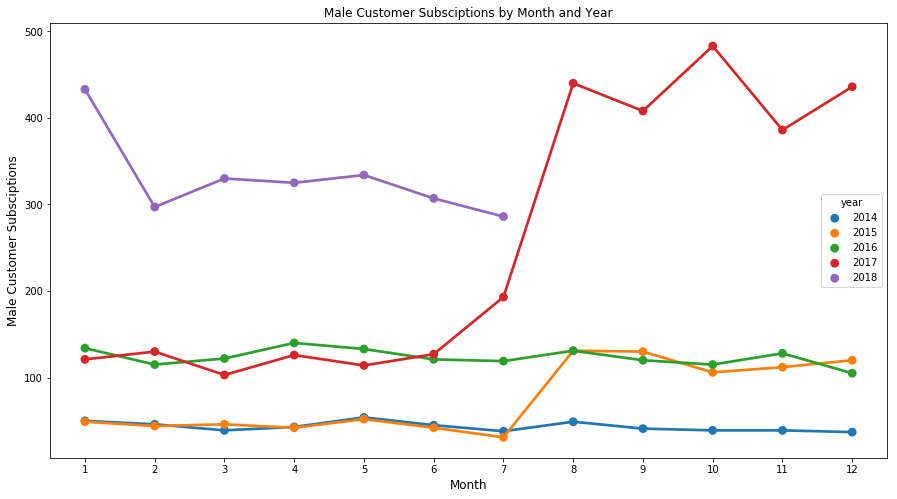

In [35]:
membership_subs_male = profile[(profile['year'] >= 2014) & (profile['gender'] == 'M')].groupby(['year','month'], as_index=False).agg({'id':'count'})
plt.figure(figsize=(15,8))
sns.pointplot(x="month", y="id", hue="year", data = membership_subs_male)
plt.ylabel('Male Customer Subsciptions', fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.title('Male Customer Subsciptions by Month and Year');

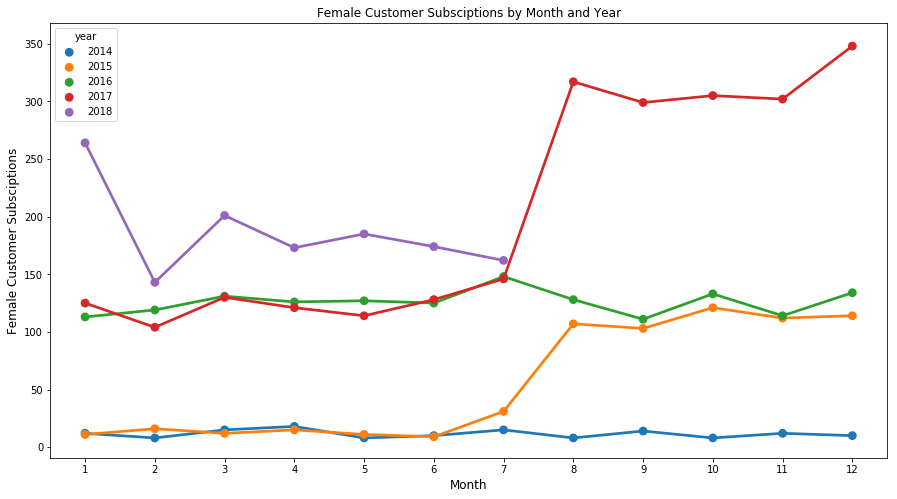

In [36]:
membership_subs_female = profile[(profile['year'] >= 2014) & (profile['gender'] == 'F')].groupby(['year','month'], as_index=False).agg({'id':'count'})
plt.figure(figsize=(15,8))
sns.pointplot(x="month", y="id", hue="year", data = membership_subs_female)
plt.ylabel('Female Customer Subsciptions', fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.title('Female Customer Subsciptions by Month and Year');

In [37]:
profile['gender'].value_counts()

M    8484
F    6124
O     212
Name: gender, dtype: int64

## Data Combination

In [38]:
#check a random person with a random offer id
transcript[(transcript['person'] == '78afa995795e4d85b5d9ceeca43f5fef')
          & (transcript['value'] == '9b98b8c7a33c4b65b9aebfe6a799e6d9')]

,event,person,time,value,type
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer id
15561,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer id
47583,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_id


In [39]:
portfolio[portfolio['id'] == '9b98b8c7a33c4b65b9aebfe6a799e6d9']

,difficulty,duration,id,offer_type,reward,web,email,mobile,social
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,1,0


In [40]:
# transaction counts almost 50% of event in transcript. then is offer received, offer viewed and offer completed
# this makes business sense
transcript['event'].value_counts(normalize = True)

transaction        0.453304
offer received     0.248837
offer viewed       0.188315
offer completed    0.109544
Name: event, dtype: float64

In [41]:
transcript.type.value_counts()

amount      138953
offer id    134002
offer_id     33579
Name: type, dtype: int64

In [42]:
# replace offer id by offer_id
transcript.type = transcript.type.str.replace(" ", "_")
transcript.type.value_counts(normalize = True)

offer_id    0.546696
amount      0.453304
Name: type, dtype: float64

In [43]:
# merge transaction data and portfolio data together
# we can see that the discount type offer and bogo type offers are about half and half splited among completed offers
test_person_transactions = pd.merge(transcript[(transcript['type'] == 'offer_id') 
                                               & (transcript['event'] == 'offer completed')], portfolio, 
                                    how = 'inner', left_on = 'value', right_on = 'id')
test_person_transactions.offer_type.value_counts(normalize = True)
                                    

discount    0.533369
bogo        0.466631
Name: offer_type, dtype: float64

In [44]:
transcript.head()

,event,person,time,value,type
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_id
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_id
2,offer received,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,offer_id
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,offer_id
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,offer_id


In [45]:
# to see the transaction amount of a randome person
ran_person_trans = transcript[(transcript['person'] == '78afa995795e4d85b5d9ceeca43f5fef') 
                              & (transcript['type'] == 'amount')].reset_index()

In [46]:
ran_person_trans.head(10)

,index,event,person,time,value,type
0,47582,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,19.89,amount
1,49502,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,17.78,amount
2,87134,transaction,78afa995795e4d85b5d9ceeca43f5fef,222,19.67,amount
3,92104,transaction,78afa995795e4d85b5d9ceeca43f5fef,240,29.72,amount
4,141566,transaction,78afa995795e4d85b5d9ceeca43f5fef,378,23.93,amount
5,218393,transaction,78afa995795e4d85b5d9ceeca43f5fef,510,21.72,amount
6,230412,transaction,78afa995795e4d85b5d9ceeca43f5fef,534,26.56,amount


In [47]:
ran_person_trans['TimeFromLastPurchase'] = ran_person_trans.time.diff()

In [48]:
ran_person_trans.head()

,index,event,person,time,value,type,TimeFromLastPurchase
0,47582,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,19.89,amount,NaN
1,49502,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,17.78,amount,12.0
2,87134,transaction,78afa995795e4d85b5d9ceeca43f5fef,222,19.67,amount,78.0
3,92104,transaction,78afa995795e4d85b5d9ceeca43f5fef,240,29.72,amount,18.0
4,141566,transaction,78afa995795e4d85b5d9ceeca43f5fef,378,23.93,amount,138.0


In [49]:
ran_person_trans.iloc[0, -1] = ran_person_trans.loc[0, 'time']
ran_person_trans['value'] = ran_person_trans.value.apply(lambda x: float(x))
ran_person_trans['time'] =ran_person_trans.time.apply(lambda x: int(x))
#ran_person_trans.drop('index', axis=1, inplace = True)
ran_person_trans.head()

,index,event,person,time,value,type,TimeFromLastPurchase
0,47582,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,19.89,amount,132.0
1,49502,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,17.78,amount,12.0
2,87134,transaction,78afa995795e4d85b5d9ceeca43f5fef,222,19.67,amount,78.0
3,92104,transaction,78afa995795e4d85b5d9ceeca43f5fef,240,29.72,amount,18.0
4,141566,transaction,78afa995795e4d85b5d9ceeca43f5fef,378,23.93,amount,138.0


In [50]:
ran_person_trans.groupby('person').agg({'value':'mean' #Average transaction Amount
                                       , 'TimeFromLastPurchase':'mean' #Average time between purchases
                                        , 'time':'max' # How long they have been a Starbucks member
                                               })

,value,TimeFromLastPurchase,time
person,,,
78afa995795e4d85b5d9ceeca43f5fef,22.752857,76.285714,534


In [51]:
ran_person_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
index                   7 non-null int64
event                   7 non-null object
person                  7 non-null object
time                    7 non-null int64
value                   7 non-null float64
type                    7 non-null object
TimeFromLastPurchase    7 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 472.0+ bytes


# Promotion effect

In [52]:
# to creat a dataset that contains information of people who received offer and who completed the offer
completion = pd.merge(transcript[transcript['event'] == 'offer received'],
                      transcript[transcript['event'] == 'offer completed'],
                      how = 'left',
                      left_on = ['person', 'value'],
                      right_on = ['person', 'value'])

completion.head(10)

,event_x,person,time_x,value,type_x,event_y,time_y,type_y
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_id,offer completed,132.0,offer_id
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_id,NaN,NaN,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,offer_id,NaN,NaN,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,offer_id,NaN,NaN,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,offer_id,NaN,NaN,NaN
5,offer received,389bc3fa690240e798340f5a15918d5c,0,f19421c1d4aa40978ebb69ca19b0e20d,offer_id,offer completed,60.0,offer_id
6,offer received,389bc3fa690240e798340f5a15918d5c,0,f19421c1d4aa40978ebb69ca19b0e20d,offer_id,offer completed,600.0,offer_id
7,offer received,c4863c7985cf408faee930f111475da3,0,2298d6c36e964ae4a3e7e9706d1fb8c2,offer_id,NaN,NaN,NaN
8,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,3f207df678b143eea3cee63160fa8bed,offer_id,NaN,NaN,NaN
9,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_id,NaN,NaN,NaN


In [53]:
completion['time_y'] = completion['time_y'].apply(lambda x: float(x))
completion['time_x'] = completion['time_x'].apply(lambda x: float(x))

In [54]:
completion[completion['person'] == '78afa995795e4d85b5d9ceeca43f5fef']

,event_x,person,time_x,value,type_x,event_y,time_y,type_y
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_id,offer completed,132.0,offer_id
14258,offer received,78afa995795e4d85b5d9ceeca43f5fef,168.0,5a8bc65990b245e5a138643cd4eb9837,offer_id,NaN,NaN,NaN
43028,offer received,78afa995795e4d85b5d9ceeca43f5fef,408.0,ae264e3637204a6fb9bb56bc8210ddfd,offer_id,offer completed,510.0,offer_id
57554,offer received,78afa995795e4d85b5d9ceeca43f5fef,504.0,f19421c1d4aa40978ebb69ca19b0e20d,offer_id,offer completed,510.0,offer_id


In [55]:
completion = completion[ ((completion['time_y'] >= completion['time_x']) )
                          | (pd.isnull(completion['event_y']) == True)
            ][['person', 'time_x', 'value', 'event_y', 'time_y']]

completion['TimeToCompleteOffer'] = completion['time_y'] - completion['time_x']
completion['CompletedOffer'] = completion['event_y'].apply(lambda x: 0 if pd.isnull(x) == True else 1)
completion.head(10)

,person,time_x,value,event_y,time_y,TimeToCompleteOffer,CompletedOffer
0,78afa995795e4d85b5d9ceeca43f5fef,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer completed,132.0,132.0,1
1,a03223e636434f42ac4c3df47e8bac43,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN,0
2,e2127556f4f64592b11af22de27a7932,0.0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0.0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN,0
4,68617ca6246f4fbc85e91a2a49552598,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN,0
5,389bc3fa690240e798340f5a15918d5c,0.0,f19421c1d4aa40978ebb69ca19b0e20d,offer completed,60.0,60.0,1
6,389bc3fa690240e798340f5a15918d5c,0.0,f19421c1d4aa40978ebb69ca19b0e20d,offer completed,600.0,600.0,1
7,c4863c7985cf408faee930f111475da3,0.0,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,NaN,NaN,0
8,2eeac8d8feae4a8cad5a6af0499a211d,0.0,3f207df678b143eea3cee63160fa8bed,NaN,NaN,NaN,0
9,aa4862eba776480b8bb9c68455b8c2e1,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN,0


In [56]:
completion.tail()

,person,time_x,value,event_y,time_y,TimeToCompleteOffer,CompletedOffer
86426,a57890c3bbb7463e9018abb7fecadb15,576.0,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN,NaN,0
86427,d087c473b4d247ccb0abfef59ba12b0e,576.0,ae264e3637204a6fb9bb56bc8210ddfd,offer completed,636.0,60.0,1
86429,6d5f3a774f3d4714ab0c092238f3a1d7,576.0,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,NaN,NaN,0
86430,9dc1421481194dcd9400aec7c9ae6366,576.0,ae264e3637204a6fb9bb56bc8210ddfd,offer completed,594.0,18.0,1
86431,e4052622e5ba45a8b96b59aba68cf068,576.0,3f207df678b143eea3cee63160fa8bed,NaN,NaN,NaN,0


In [57]:
#This person may have a lot of transactions as we checked before, but only complete three offers

completion[completion['person'] == '78afa995795e4d85b5d9ceeca43f5fef']

,person,time_x,value,event_y,time_y,TimeToCompleteOffer,CompletedOffer
0,78afa995795e4d85b5d9ceeca43f5fef,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer completed,132.0,132.0,1
14258,78afa995795e4d85b5d9ceeca43f5fef,168.0,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN,NaN,0
43028,78afa995795e4d85b5d9ceeca43f5fef,408.0,ae264e3637204a6fb9bb56bc8210ddfd,offer completed,510.0,102.0,1
57554,78afa995795e4d85b5d9ceeca43f5fef,504.0,f19421c1d4aa40978ebb69ca19b0e20d,offer completed,510.0,6.0,1


In [58]:
completion[completion['person'] == '9dc1421481194dcd9400aec7c9ae6366']

,person,time_x,value,event_y,time_y,TimeToCompleteOffer,CompletedOffer
43024,9dc1421481194dcd9400aec7c9ae6366,336.0,4d5c57ea9a6940dd891ad53e9dbe8da0,offer completed,360.0,24.0,1
57550,9dc1421481194dcd9400aec7c9ae6366,408.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer completed,414.0,6.0,1
86430,9dc1421481194dcd9400aec7c9ae6366,576.0,ae264e3637204a6fb9bb56bc8210ddfd,offer completed,594.0,18.0,1


In [59]:
completion.CompletedOffer.value_counts()

1    40488
0    40280
Name: CompletedOffer, dtype: int64

In [60]:
completion.shape

(80768, 7)

# Does the type of offer determine if someone will complete it and how long it will take to complete?

In [61]:
offer_person = pd.merge(completion
         ,portfolio
         , how = 'inner'
         , left_on = 'value'
         , right_on = 'id'
        )[['person','time_x','value','CompletedOffer','TimeToCompleteOffer'
          , 'difficulty','duration','offer_type','reward','email','mobile','social','web'
          ]]
offer_person.columns = ['person','offer_time','value','CompletedOffer','TimeToCompleteOffer'
                          ,'difficulty','duration','offer_type','reward'
                          , 'email','mobile','social','web']

offer_person['NetReward'] = offer_person['reward'] - offer_person['difficulty']
offer_person.head()

,person,offer_time,value,CompletedOffer,TimeToCompleteOffer,difficulty,duration,offer_type,reward,email,mobile,social,web,NetReward
0,78afa995795e4d85b5d9ceeca43f5fef,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,132.0,5,7,bogo,5,1,1,0,1,0
1,ebe7ef46ea6f4963a7dd49f501b26779,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,NaN,5,7,bogo,5,1,1,0,1,0
2,f082d80f0aac47a99173ba8ef8fc1909,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,12.0,5,7,bogo,5,1,1,0,1,0
3,c0d210398dee4a0895b24444a5fcd1d2,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,66.0,5,7,bogo,5,1,1,0,1,0
4,57dd18ec5ddc46828afb81ec5977bef2,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,NaN,5,7,bogo,5,1,1,0,1,0


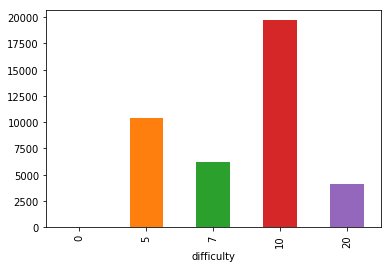

In [62]:
#surprisingly difficulty 10 has the highest completion rate among others
offer_person.groupby('difficulty').CompletedOffer.agg('sum').plot.bar()

In [63]:
offer_person.groupby('reward').CompletedOffer.agg('sum')

reward
0         0
2     11261
3      6196
5     14568
10     8463
Name: CompletedOffer, dtype: int64

In [64]:
offer_person.offer_type.value_counts()

discount         33073
bogo             32460
informational    15235
Name: offer_type, dtype: int64

In [65]:
offer_person.groupby(['person', 'offer_type']).CompletedOffer.agg('sum')

person                            offer_type   
0009655768c64bdeb2e877511632db8f  bogo             1
                                  discount         2
                                  informational    0
00116118485d4dfda04fdbaba9a87b5c  bogo             0
0011e0d4e6b944f998e987f904e8c1e5  bogo             1
                                  discount         2
                                  informational    0
0020c2b971eb4e9188eac86d93036a77  bogo             1
                                  discount         3
                                  informational    0
0020ccbbb6d84e358d3414a3ff76cffd  bogo             2
                                  discount         1
                                  informational    0
003d66b6608740288d6cc97a6903f4f0  discount         4
                                  informational    0
00426fe3ffde4c6b9cb9ad6d077a13ea  discount         1
                                  informational    0
004b041fbfe44859945daa2c7f79ee64  bogo             

In [66]:
from sklearn import cluster
from sklearn.cluster import KMeans

In [67]:
x = pd.merge(offer_person, profile, how='left', left_on = 'person', right_on = 'id')
new_x = pd.get_dummies(data=x, columns=['gender']).fillna(0)

In [68]:
new_x.head()

,person,offer_time,value,CompletedOffer,TimeToCompleteOffer,difficulty,duration,offer_type,reward,email,...,age,id,income,year,month,daty,date,gender_F,gender_M,gender_O
0,78afa995795e4d85b5d9ceeca43f5fef,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,132.0,5,7,bogo,5,1,...,75.0,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017.0,5.0,9.0,2017-05-09 00:00:00,1,0,0
1,ebe7ef46ea6f4963a7dd49f501b26779,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0.0,5,7,bogo,5,1,...,59.0,ebe7ef46ea6f4963a7dd49f501b26779,41000.0,2015.0,1.0,21.0,2015-01-21 00:00:00,0,1,0
2,f082d80f0aac47a99173ba8ef8fc1909,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,12.0,5,7,bogo,5,1,...,40.0,f082d80f0aac47a99173ba8ef8fc1909,33000.0,2016.0,7.0,9.0,2016-07-09 00:00:00,0,1,0
3,c0d210398dee4a0895b24444a5fcd1d2,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,66.0,5,7,bogo,5,1,...,45.0,c0d210398dee4a0895b24444a5fcd1d2,33000.0,2018.0,7.0,7.0,2018-07-07 00:00:00,0,1,0
4,57dd18ec5ddc46828afb81ec5977bef2,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0.0,5,7,bogo,5,1,...,54.0,57dd18ec5ddc46828afb81ec5977bef2,80000.0,2017.0,2.0,7.0,2017-02-07 00:00:00,1,0,0


In [69]:
new_x = pd.get_dummies(data = new_x, columns = ['offer_type'])

In [70]:
new_x.drop([ 'person', 'id', 'date', 'value'], axis=1, inplace = True)

In [71]:
new_x.head()

,offer_time,CompletedOffer,TimeToCompleteOffer,difficulty,duration,reward,email,mobile,social,web,...,income,year,month,daty,gender_F,gender_M,gender_O,offer_type_bogo,offer_type_discount,offer_type_informational
0,0.0,1,132.0,5,7,5,1,1,0,1,...,100000.0,2017.0,5.0,9.0,1,0,0,1,0,0
1,0.0,0,0.0,5,7,5,1,1,0,1,...,41000.0,2015.0,1.0,21.0,0,1,0,1,0,0
2,0.0,1,12.0,5,7,5,1,1,0,1,...,33000.0,2016.0,7.0,9.0,0,1,0,1,0,0
3,0.0,1,66.0,5,7,5,1,1,0,1,...,33000.0,2018.0,7.0,7.0,0,1,0,1,0,0
4,0.0,0,0.0,5,7,5,1,1,0,1,...,80000.0,2017.0,2.0,7.0,1,0,0,1,0,0


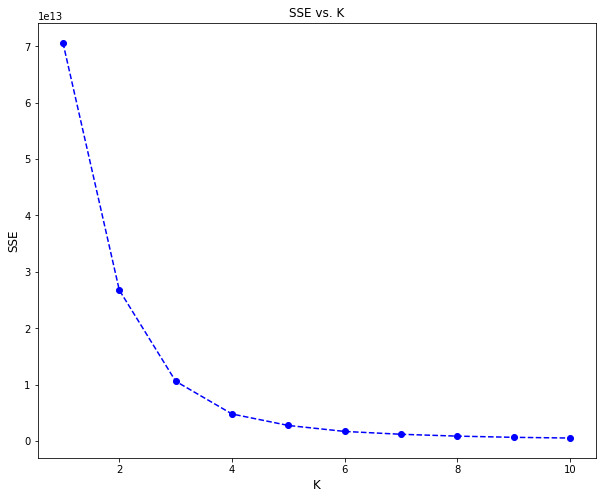

In [72]:
scores = []

for k in range(1,11):
    kmeans = KMeans(k)
    
    model = kmeans.fit(new_x)
    
    scores.append(abs(model.score(new_x)))
    
plt.figure(figsize=(10,8))
plt.plot(range(1,11), scores, linestyle='--', marker='o', color='b');
plt.xlabel('K', fontsize = 12);
plt.ylabel('SSE', fontsize = 12);
plt.title('SSE vs. K', fontsize = 12);

In [73]:
clust = cluster.AgglomerativeClustering(3, linkage='ward')
new_x['Cluster_3'] = clust.fit_predict(new_x)

In [75]:
new_x.shape

(80768, 23)

In [76]:
new_x.Cluster_3.value_counts(normalize = True)

0    0.501585
1    0.376647
2    0.121769
Name: Cluster_3, dtype: float64

In [77]:
new_x.head()

,offer_time,CompletedOffer,TimeToCompleteOffer,difficulty,duration,reward,email,mobile,social,web,...,year,month,daty,gender_F,gender_M,gender_O,offer_type_bogo,offer_type_discount,offer_type_informational,Cluster_3
0,0.0,1,132.0,5,7,5,1,1,0,1,...,2017.0,5.0,9.0,1,0,0,1,0,0,0
1,0.0,0,0.0,5,7,5,1,1,0,1,...,2015.0,1.0,21.0,0,1,0,1,0,0,1
2,0.0,1,12.0,5,7,5,1,1,0,1,...,2016.0,7.0,9.0,0,1,0,1,0,0,1
3,0.0,1,66.0,5,7,5,1,1,0,1,...,2018.0,7.0,7.0,0,1,0,1,0,0,1
4,0.0,0,0.0,5,7,5,1,1,0,1,...,2017.0,2.0,7.0,1,0,0,1,0,0,0


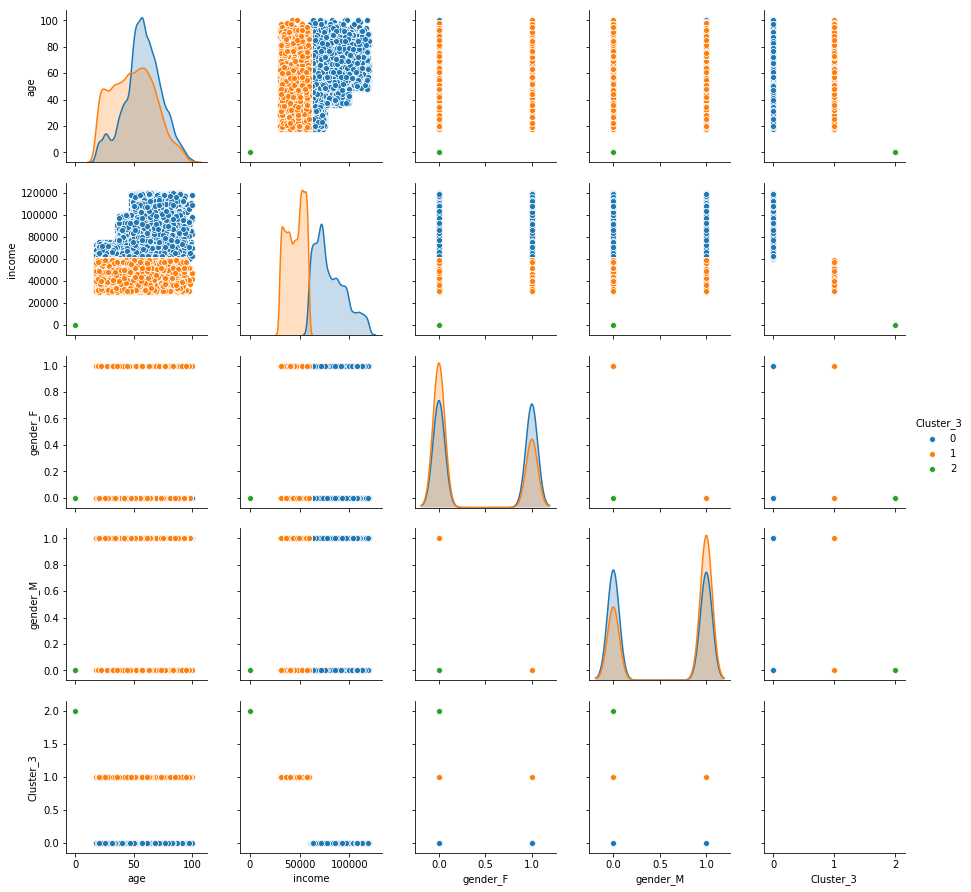

In [88]:
visual_columns = ['age'
                  ,'income'
                  ,'gender_F'
                  ,'gender_M'
                  ,'Cluster_3']

sns_personal_attributes = sns.pairplot(new_x[visual_columns].fillna(0), hue='Cluster_3');
sns_personal_attributes.savefig("personal_attributes_clusters.png")

In [81]:
new_x.groupby('Cluster_3').agg({'offer_type_bogo':'sum', 'offer_type_discount':'sum', 'offer_type_informational':'sum'})

,offer_type_bogo,offer_type_discount,offer_type_informational
Cluster_3,,,
0,16325.0,16691.0,7496.0
1,12172.0,12452.0,5797.0
2,3963.0,3930.0,1942.0


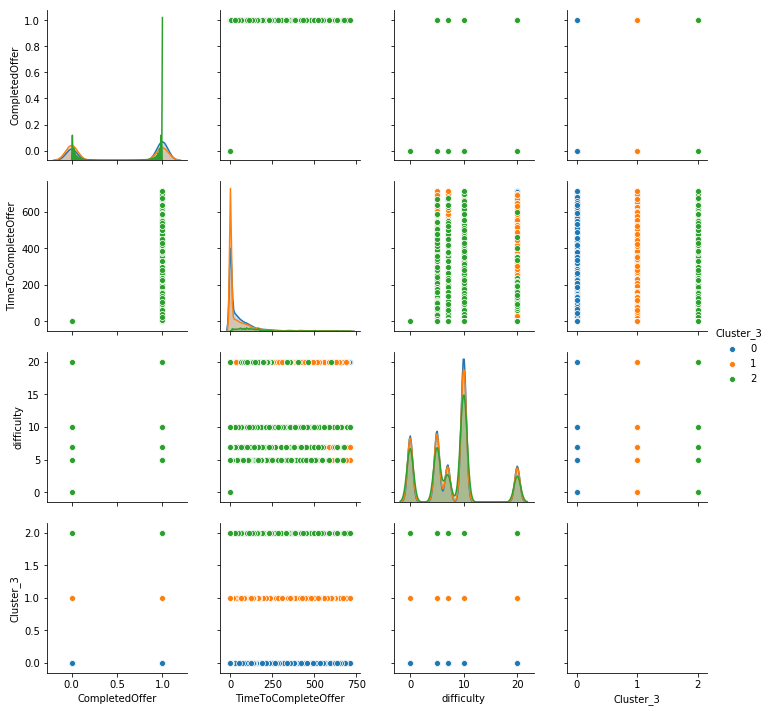

In [87]:
visual_columns = ['CompletedOffer'
                  ,'TimeToCompleteOffer'
                  ,'difficulty'
                  ,'Cluster_3']

sns_personal_attributes = sns.pairplot(new_x[visual_columns].fillna(0), hue='Cluster_3');
sns_personal_attributes.savefig("offer_attributes_clusters.png")

In [85]:
new_x.head()

,offer_time,CompletedOffer,TimeToCompleteOffer,difficulty,duration,reward,email,mobile,social,web,...,year,month,daty,gender_F,gender_M,gender_O,offer_type_bogo,offer_type_discount,offer_type_informational,Cluster_3
0,0.0,1,132.0,5,7,5,1,1,0,1,...,2017.0,5.0,9.0,1,0,0,1,0,0,0
1,0.0,0,0.0,5,7,5,1,1,0,1,...,2015.0,1.0,21.0,0,1,0,1,0,0,1
2,0.0,1,12.0,5,7,5,1,1,0,1,...,2016.0,7.0,9.0,0,1,0,1,0,0,1
3,0.0,1,66.0,5,7,5,1,1,0,1,...,2018.0,7.0,7.0,0,1,0,1,0,0,1
4,0.0,0,0.0,5,7,5,1,1,0,1,...,2017.0,2.0,7.0,1,0,0,1,0,0,0


## Conslusion
### Now we know that there are more female customers than males in the data set, and the female customers intend to have a higher income. The whole group of customers in the group have a higher salary than the US median income, and this shows that Starbucks is favourable by the middle class.

### Among all the offers, the offer with difficulty 10 has the highest completion rate, which may shed light on future promotion strategy of Starbucks.

### Unfortunately, these clusters seem to be appropriate for segmenting the customers’ attribute, but not for the transactional information. This will be one direction of my future studies. I also want to do supervised learning to find a more effective promotion strategy given customers’ historical data.